In [ ]:
!pip install Selenium

!apt-get update # to update ubuntu to correctly run apt install

!apt install chromium-chromedriver

In [29]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd 
from urllib.parse import quote

In [30]:
import time
from selenium.webdriver.common.keys import Keys


In [27]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [31]:
base_url = 'https://search.naver.com/search.naver?where=view&sm=tab_jum&query='
url = base_url + quote('국토종주')

In [32]:
wd.get(url)

In [33]:
from selenium.webdriver.common.keys import Keys

body = wd.find_element_by_tag_name('body')
for i in range(30):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(2)

In [34]:
html = wd.page_source
soup = BeautifulSoup(html, 'html.parser')

In [35]:
lis = soup.select('li.bx._svp_item')
len(lis)

81

In [36]:
li = lis[0]
title = li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text()
content = li.select_one('div.api_txt_lines.dsc_txt').get_text()
date = li.select_one('.sub_time.sub_txt').get_text()
title, date, content

('국토종주 1일차 : 일산에서 여주까지 약 150km',
 '2021.07.27.',
 '자전거를 취미/운동삼아 타던 어느날 문득 국토종주를 하고싶다는 생각이 들었습니다. 유튜브를 보면... 바보같이 여기 종주 인증수첩을 놔두고 와 버렸습니다. 이때가 오후 4시 쯤이었는데, 해가 넘어갈 때쯤이 되니 강물이...')

In [37]:
title_list, content_list, date_list = [],[],[]
for i, li in enumerate(lis):
    try:
        adv = li.select_one('a.link_ad').get_text()
        if adv.strip() == '광고':
            continue
    except:
        title = li.select_one('a.api_txt_lines.total_tit').get_text()
        content = li.select_one('div.api_txt_lines.dsc_txt').get_text()
        date = li.select_one('.sub_time.sub_txt').get_text()

        title_list.append(title)
        content_list.append(content)
        date_list.append(date)

        #print(i)

In [38]:
df = pd.DataFrame({
    'title':title_list, 'date':date_list, 'content':content_list
})
df

,title,date,content
0,국토종주 1일차 : 일산에서 여주까지 약 150km,2021.07.27.,자전거를 취미/운동삼아 타던 어느날 문득 국토종주를 하고싶다는 생각이 들었습니다. ...
1,자전거 국토종주 그랜드슬램 메달 & 인증서,2021.08.03.,"국토완주 그랜드슬램 인증서는 4대강종주와 국토종주 그리고 제주환상, 동해안(강원과 ..."
2,하루에 6만보 걸어서 진해 창원 마산까지 울면서국토종주,2021.08.17.,주셨습니다 국토종주같이 훌륭한일인데...하시면서 사실 조금 부끄러웠습니다 오늘은 부...
3,부산 자전거여행｜낙동강 하구둑 자전거 국토종주 인증센터,4일 전,행정자치부와 국토교통부에서는 2012년 4월 22일부터 '국토종주인증제'를 시행하여...
4,자전거 국토종주 3일차 (칠곡보 ~ 창녕함안보) - #0003,2021.06.14.,국토종주 3일차 칠곡보 → 창녕함안보 드디어 국토종주의 마지막날 아침이 밝았다. 김...
...,...,...,...
76,국토종주 타이어 변경질문,2021.08.18.,물론 제엔진이 최악이지만 그나마 타이어를 바꾸면 조금 이라도 따라갈수 있지않을까싶어...
77,자전거 국토 종주 시작! 뚝섬전망콤플렉스 인증센터,2일 전,그렇게하여 시작된 자전거 국토종주.. 아.. 사실 아직 시작은 안 했다. 정말 딱 ...
78,국토종주 자전거,2021.07.13.,**********************************************...
79,나의 국토종주 이야기,2021.07.29.,★ 챌린지 미션에 맞는 글을 올려주세요 엉뚱한 글로 선정 검증 때 운영진의 불필요한...


In [41]:
df.to_csv('국토종주blog.csv')

In [65]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
!pip install konlpy > /dev/null

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [4]:
from PIL import Image
import numpy as np

In [5]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]


Saving 국토종주_blog.txt to 국토종주_blog.txt


In [6]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving 자전거.jpg to 자전거.jpg


In [7]:
with open(textfile) as fp:
  text = fp.read()

In [12]:
from konlpy.tag import Okt
okt = Okt()

In [13]:
tokens = okt.nouns(text)
tokens[:10]

['국토', '종주', '일산', '여주', '약', '자전거', '취미', '운동', '날', '문득']

In [14]:
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic') 

In [9]:
keys = list(wc.words_.keys())
values = list(wc.words_.values())
for i in range(10):
  print(keys[i],':',values[i])

국토종주 : 1.0
자전거 : 0.40625
자전거 국토종주 : 0.3541666666666667
자전거길 : 0.28125
종주 : 0.21875
국토종주를 : 0.1875
낙동강 : 0.16666666666666666
국토 : 0.11458333333333333
동해안 : 0.10416666666666667
부산 : 0.10416666666666667


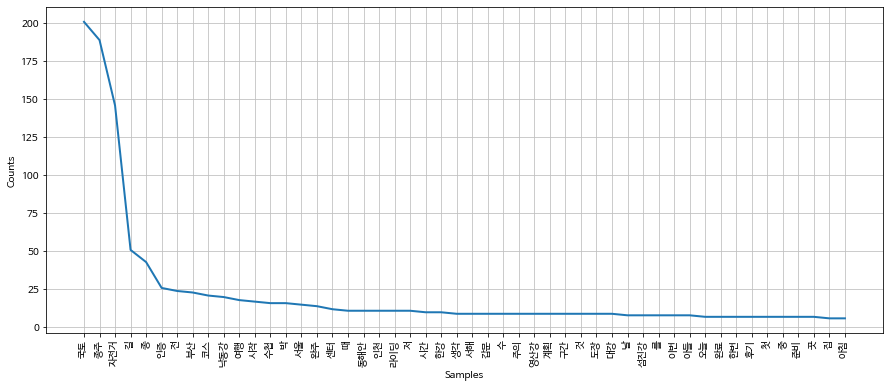

In [19]:
words = nltk.Text(new_tokens, name='국토')
plt.figure(figsize=(15,6))
words.plot(50)
plt.show()

In [20]:
data = words.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white'
).generate_from_frequencies(dict(data))

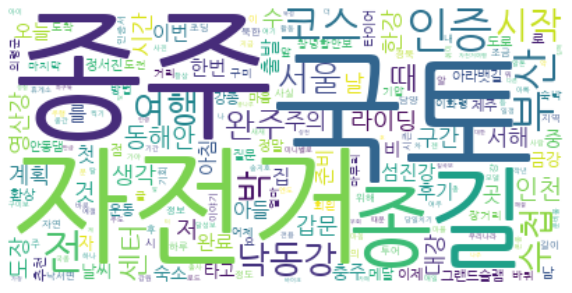

In [21]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [23]:
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white', mask=mask,
        min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

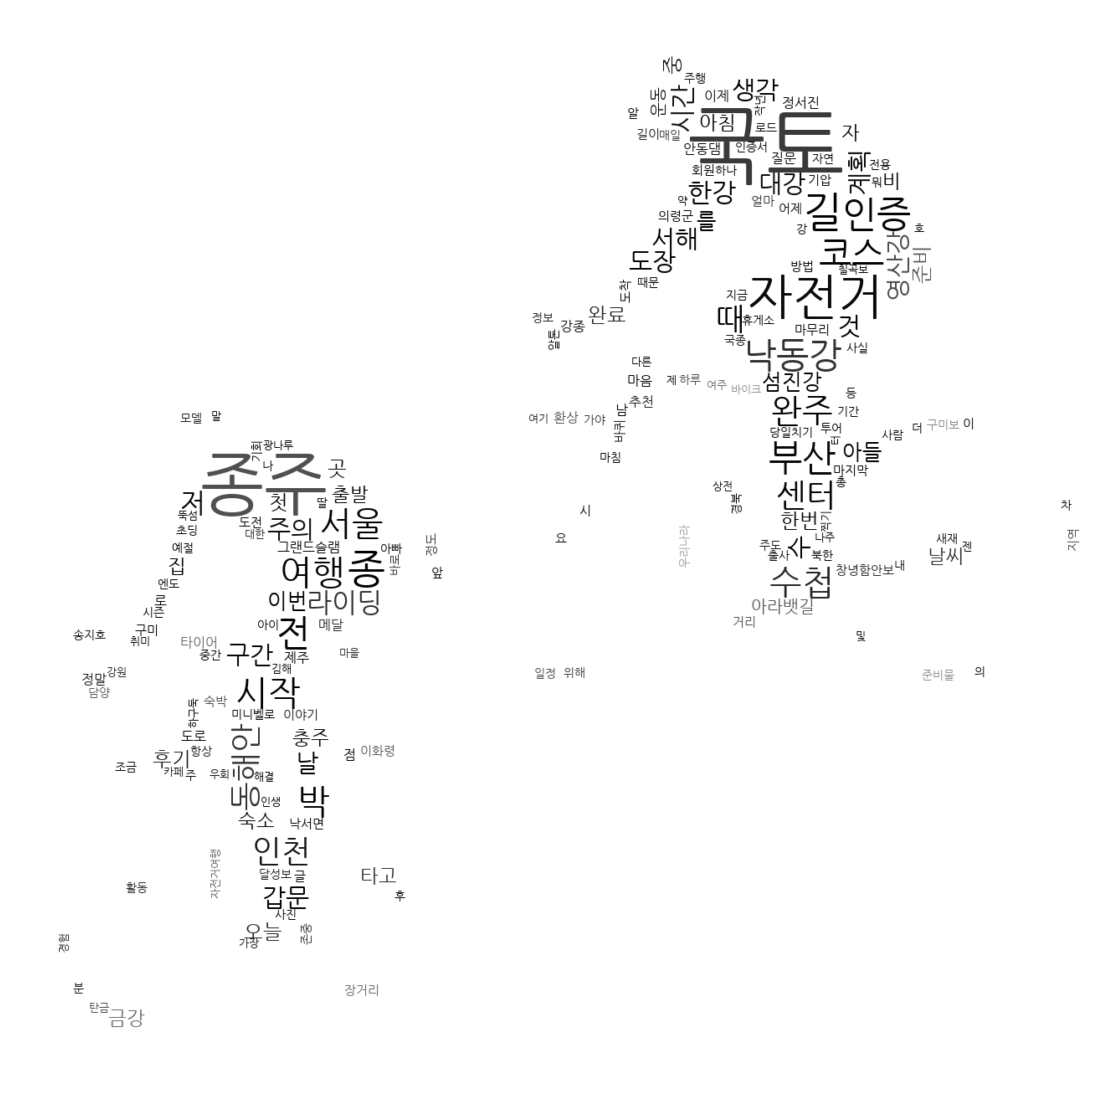

In [25]:
plt.figure(figsize=(30,20))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()